Parallel Single-channel CSC
===========================

This example compares the use of [parcbpdn.ParConvBPDN](http://sporco.rtfd.org/en/latest/modules/sporco.admm.parcbpdn.html#sporco.admm.parcbpdn.ParConvBPDN) with [admm.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdn.html#sporco.admm.cbpdn.ConvBPDN) solving a convolutional sparse coding problem with a greyscale signal

  $$\mathrm{argmin}_\mathbf{x} \; \frac{1}{2} \left\| \sum_m \mathbf{d}_m * \mathbf{x}_{m} - \mathbf{s} \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_{m} \|_1 \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}$ is the input image.

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.admm import cbpdn
from sporco.admm import parcbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', zoom=1.0, scaled=True,
                                 gray=True, idxexp=np.s_[160:416, 60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = signal.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

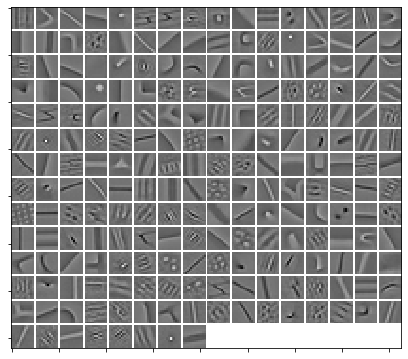

In [4]:
D = util.convdicts()['G:12x12x216']
plot.imview(util.tiledict(D), fgsz=(7, 7))

lmbda = 5e-2

The RelStopTol option was chosen for the two different methods to stop with similar functional values

Initialise and run standard serial CSC solver using ADMM with an equality constraint [[46]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2014-efficient).

In [5]:
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 200,
                              'RelStopTol': 5e-3, 'AuxVarObj': False,
                              'AutoRho': {'Enabled': False}})
b = cbpdn.ConvBPDN(D, sh, lmbda, opt=opt, dimK=0)
X = b.solve()

Itn   Fnc       DFid      Regℓ1     r         s       
------------------------------------------------------


   0  8.14e+01  3.14e-02  1.63e+03  1.00e+00  0.00e+00


   1  7.77e+01  2.13e-01  1.55e+03  9.98e-01  9.36e-03


   2  7.51e+01  4.97e-01  1.49e+03  9.79e-01  4.81e-02


   3  7.15e+01  8.36e-01  1.41e+03  8.35e-01  1.01e-01


   4  6.66e+01  1.14e+00  1.31e+03  4.32e-01  1.29e-01


   5  6.62e+01  1.36e+00  1.30e+03  2.80e-01  1.23e-01


   6  6.80e+01  1.49e+00  1.33e+03  2.23e-01  1.04e-01


   7  6.73e+01  1.58e+00  1.31e+03  1.94e-01  9.24e-02


   8  6.43e+01  1.67e+00  1.25e+03  1.75e-01  8.29e-02


   9  6.05e+01  1.78e+00  1.17e+03  1.61e-01  7.29e-02


  10  5.67e+01  1.91e+00  1.10e+03  1.50e-01  6.27e-02


  11  5.35e+01  2.05e+00  1.03e+03  1.39e-01  5.47e-02


  12  5.12e+01  2.20e+00  9.80e+02  1.27e-01  4.94e-02


  13  4.96e+01  2.34e+00  9.45e+02  1.14e-01  4.60e-02


  14  4.88e+01  2.46e+00  9.26e+02  1.02e-01  4.27e-02


  15  4.84e+01  2.56e+00  9.17e+02  9.25e-02  3.95e-02


  16  4.80e+01  2.64e+00  9.07e+02  8.45e-02  3.72e-02


  17  4.71e+01  2.70e+00  8.89e+02  7.80e-02  3.56e-02


  18  4.62e+01  2.76e+00  8.69e+02  7.25e-02  3.43e-02


  19  4.54e+01  2.81e+00  8.51e+02  6.81e-02  3.21e-02


  20  4.44e+01  2.86e+00  8.31e+02  6.44e-02  2.97e-02


  21  4.34e+01  2.91e+00  8.11e+02  6.10e-02  2.75e-02


  22  4.23e+01  2.96e+00  7.87e+02  5.76e-02  2.57e-02


  23  4.12e+01  3.02e+00  7.64e+02  5.45e-02  2.43e-02


  24  4.01e+01  3.07e+00  7.41e+02  5.14e-02  2.33e-02


  25  3.93e+01  3.13e+00  7.23e+02  4.84e-02  2.24e-02


  26  3.87e+01  3.19e+00  7.11e+02  4.58e-02  2.14e-02


  27  3.84e+01  3.24e+00  7.03e+02  4.35e-02  2.02e-02


  28  3.81e+01  3.28e+00  6.96e+02  4.14e-02  1.92e-02


  29  3.78e+01  3.32e+00  6.89e+02  3.95e-02  1.83e-02


  30  3.74e+01  3.36e+00  6.80e+02  3.77e-02  1.78e-02


  31  3.69e+01  3.39e+00  6.70e+02  3.60e-02  1.74e-02


  32  3.65e+01  3.42e+00  6.61e+02  3.45e-02  1.69e-02


  33  3.62e+01  3.44e+00  6.54e+02  3.31e-02  1.62e-02


  34  3.59e+01  3.47e+00  6.48e+02  3.19e-02  1.55e-02


  35  3.56e+01  3.49e+00  6.42e+02  3.08e-02  1.48e-02


  36  3.52e+01  3.51e+00  6.34e+02  2.97e-02  1.42e-02


  37  3.48e+01  3.53e+00  6.26e+02  2.87e-02  1.37e-02


  38  3.43e+01  3.55e+00  6.15e+02  2.76e-02  1.33e-02


  39  3.38e+01  3.57e+00  6.05e+02  2.65e-02  1.30e-02


  40  3.34e+01  3.60e+00  5.96e+02  2.55e-02  1.27e-02


  41  3.30e+01  3.62e+00  5.88e+02  2.46e-02  1.22e-02


  42  3.28e+01  3.64e+00  5.82e+02  2.37e-02  1.17e-02


  43  3.25e+01  3.66e+00  5.77e+02  2.29e-02  1.13e-02


  44  3.23e+01  3.69e+00  5.71e+02  2.22e-02  1.08e-02


  45  3.20e+01  3.71e+00  5.66e+02  2.15e-02  1.05e-02


  46  3.17e+01  3.73e+00  5.60e+02  2.09e-02  1.03e-02


  47  3.14e+01  3.75e+00  5.54e+02  2.02e-02  1.01e-02


  48  3.12e+01  3.77e+00  5.49e+02  1.96e-02  9.83e-03


  49  3.10e+01  3.78e+00  5.44e+02  1.91e-02  9.54e-03


  50  3.08e+01  3.80e+00  5.41e+02  1.86e-02  9.21e-03


  51  3.07e+01  3.81e+00  5.38e+02  1.81e-02  8.90e-03


  52  3.05e+01  3.83e+00  5.34e+02  1.76e-02  8.66e-03


  53  3.03e+01  3.84e+00  5.29e+02  1.71e-02  8.48e-03


  54  3.01e+01  3.85e+00  5.25e+02  1.66e-02  8.33e-03


  55  2.99e+01  3.87e+00  5.21e+02  1.62e-02  8.19e-03


  56  2.98e+01  3.88e+00  5.17e+02  1.57e-02  8.01e-03


  57  2.96e+01  3.89e+00  5.14e+02  1.53e-02  7.79e-03


  58  2.95e+01  3.90e+00  5.12e+02  1.49e-02  7.55e-03


  59  2.94e+01  3.92e+00  5.09e+02  1.46e-02  7.33e-03


  60  2.93e+01  3.93e+00  5.07e+02  1.42e-02  7.13e-03


  61  2.91e+01  3.94e+00  5.04e+02  1.39e-02  6.97e-03


  62  2.90e+01  3.95e+00  5.01e+02  1.35e-02  6.82e-03


  63  2.89e+01  3.96e+00  4.98e+02  1.32e-02  6.69e-03


  64  2.87e+01  3.97e+00  4.95e+02  1.29e-02  6.52e-03


  65  2.86e+01  3.98e+00  4.92e+02  1.26e-02  6.35e-03


  66  2.85e+01  3.99e+00  4.90e+02  1.24e-02  6.20e-03


  67  2.83e+01  4.00e+00  4.87e+02  1.21e-02  6.08e-03


  68  2.82e+01  4.00e+00  4.84e+02  1.18e-02  5.99e-03


  69  2.81e+01  4.01e+00  4.81e+02  1.16e-02  5.91e-03


  70  2.79e+01  4.02e+00  4.78e+02  1.13e-02  5.83e-03


  71  2.78e+01  4.03e+00  4.76e+02  1.11e-02  5.72e-03


  72  2.77e+01  4.04e+00  4.74e+02  1.08e-02  5.59e-03


  73  2.77e+01  4.04e+00  4.72e+02  1.06e-02  5.45e-03


  74  2.76e+01  4.05e+00  4.71e+02  1.04e-02  5.31e-03


  75  2.75e+01  4.06e+00  4.70e+02  1.02e-02  5.16e-03


  76  2.74e+01  4.06e+00  4.68e+02  9.98e-03  5.05e-03


  77  2.73e+01  4.07e+00  4.66e+02  9.78e-03  4.96e-03


  78  2.72e+01  4.08e+00  4.63e+02  9.58e-03  4.88e-03


  79  2.71e+01  4.08e+00  4.61e+02  9.38e-03  4.81e-03


  80  2.70e+01  4.09e+00  4.59e+02  9.19e-03  4.73e-03


  81  2.69e+01  4.09e+00  4.57e+02  9.01e-03  4.64e-03


  82  2.69e+01  4.10e+00  4.55e+02  8.83e-03  4.53e-03


  83  2.68e+01  4.10e+00  4.53e+02  8.66e-03  4.43e-03


  84  2.67e+01  4.11e+00  4.52e+02  8.49e-03  4.36e-03


  85  2.66e+01  4.11e+00  4.50e+02  8.32e-03  4.27e-03


  86  2.65e+01  4.12e+00  4.48e+02  8.16e-03  4.21e-03


  87  2.64e+01  4.12e+00  4.46e+02  8.00e-03  4.13e-03


  88  2.64e+01  4.13e+00  4.45e+02  7.85e-03  4.06e-03


  89  2.63e+01  4.13e+00  4.43e+02  7.71e-03  3.99e-03


  90  2.62e+01  4.14e+00  4.42e+02  7.57e-03  3.91e-03


  91  2.61e+01  4.14e+00  4.40e+02  7.43e-03  3.83e-03


  92  2.61e+01  4.15e+00  4.38e+02  7.30e-03  3.77e-03


  93  2.60e+01  4.15e+00  4.37e+02  7.16e-03  3.72e-03


  94  2.59e+01  4.16e+00  4.35e+02  7.03e-03  3.67e-03


  95  2.59e+01  4.16e+00  4.34e+02  6.91e-03  3.61e-03


  96  2.58e+01  4.17e+00  4.33e+02  6.78e-03  3.56e-03


  97  2.57e+01  4.17e+00  4.31e+02  6.67e-03  3.50e-03


  98  2.57e+01  4.18e+00  4.30e+02  6.55e-03  3.42e-03


  99  2.57e+01  4.18e+00  4.30e+02  6.44e-03  3.35e-03


 100  2.56e+01  4.18e+00  4.29e+02  6.33e-03  3.28e-03


 101  2.56e+01  4.19e+00  4.28e+02  6.22e-03  3.23e-03


 102  2.55e+01  4.19e+00  4.27e+02  6.11e-03  3.18e-03


 103  2.55e+01  4.19e+00  4.26e+02  6.01e-03  3.14e-03


 104  2.54e+01  4.20e+00  4.25e+02  5.91e-03  3.09e-03


 105  2.54e+01  4.20e+00  4.23e+02  5.81e-03  3.05e-03


 106  2.53e+01  4.20e+00  4.22e+02  5.71e-03  3.00e-03


 107  2.53e+01  4.21e+00  4.21e+02  5.62e-03  2.95e-03


 108  2.52e+01  4.21e+00  4.20e+02  5.52e-03  2.90e-03


 109  2.52e+01  4.21e+00  4.19e+02  5.43e-03  2.85e-03


 110  2.51e+01  4.21e+00  4.18e+02  5.34e-03  2.81e-03


 111  2.51e+01  4.22e+00  4.17e+02  5.25e-03  2.76e-03


 112  2.50e+01  4.22e+00  4.16e+02  5.17e-03  2.71e-03


 113  2.50e+01  4.22e+00  4.15e+02  5.09e-03  2.65e-03


 114  2.50e+01  4.23e+00  4.15e+02  5.01e-03  2.59e-03


 115  2.49e+01  4.23e+00  4.14e+02  4.94e-03  2.54e-03
------------------------------------------------------


Initialise and run parallel CSC solver using ADMM dictionary partition method [[39]](http://sporco.rtfd.org/en/latest/zreferences.html#skau-2018-fast).

In [6]:
opt_par = parcbpdn.ParConvBPDN.Options({'Verbose': True, 'MaxMainIter': 200,
                            'RelStopTol': 1e-2, 'AuxVarObj': False, 'AutoRho':
                                        {'Enabled': False}, 'alpha': 2.5})
b_par = parcbpdn.ParConvBPDN(D, sh, lmbda, opt=opt_par, dimK=0)
X_par = b_par.solve()

Itn   Fnc       DFid      Regl1     r         s       
------------------------------------------------------


   0  4.77e+02  2.95e+02  3.65e+03  3.69e+00  3.69e+00


   1  1.07e+02  1.12e+01  1.91e+03  2.35e+00  2.18e+00


   2  1.20e+02  1.93e+01  2.02e+03  1.65e+00  1.82e+00


   3  1.05e+02  1.53e+01  1.80e+03  1.34e+00  1.72e+00


   4  8.47e+01  4.41e+00  1.61e+03  1.16e+00  1.41e+00


   5  8.02e+01  7.34e+00  1.46e+03  9.95e-01  1.29e+00


   6  7.32e+01  3.71e+00  1.39e+03  8.83e-01  1.15e+00


   7  7.07e+01  5.05e+00  1.31e+03  8.02e-01  1.05e+00


   8  6.73e+01  4.22e+00  1.26e+03  7.36e-01  9.73e-01


   9  6.53e+01  4.91e+00  1.21e+03  6.80e-01  9.01e-01


  10  6.25e+01  4.65e+00  1.16e+03  6.33e-01  8.47e-01


  11  6.04e+01  4.82e+00  1.11e+03  5.92e-01  7.94e-01


  12  5.82e+01  4.63e+00  1.07e+03  5.55e-01  7.45e-01


  13  5.62e+01  4.67e+00  1.03e+03  5.23e-01  7.04e-01


  14  5.44e+01  4.59e+00  9.97e+02  4.95e-01  6.69e-01


  15  5.28e+01  4.60e+00  9.64e+02  4.69e-01  6.34e-01


  16  5.14e+01  4.57e+00  9.37e+02  4.46e-01  6.04e-01


  17  5.01e+01  4.58e+00  9.11e+02  4.25e-01  5.75e-01


  18  4.89e+01  4.57e+00  8.87e+02  4.06e-01  5.51e-01


  19  4.79e+01  4.57e+00  8.66e+02  3.88e-01  5.27e-01


  20  4.69e+01  4.57e+00  8.47e+02  3.72e-01  5.06e-01


  21  4.61e+01  4.59e+00  8.30e+02  3.57e-01  4.86e-01


  22  4.53e+01  4.60e+00  8.14e+02  3.44e-01  4.67e-01


  23  4.45e+01  4.61e+00  7.98e+02  3.31e-01  4.49e-01


  24  4.38e+01  4.61e+00  7.83e+02  3.19e-01  4.33e-01


  25  4.31e+01  4.60e+00  7.70e+02  3.07e-01  4.17e-01


  26  4.25e+01  4.60e+00  7.57e+02  2.97e-01  4.03e-01


  27  4.18e+01  4.58e+00  7.45e+02  2.86e-01  3.89e-01


  28  4.11e+01  4.57e+00  7.31e+02  2.77e-01  3.76e-01


  29  4.05e+01  4.56e+00  7.18e+02  2.68e-01  3.65e-01


  30  3.99e+01  4.54e+00  7.08e+02  2.60e-01  3.55e-01


  31  3.95e+01  4.53e+00  6.99e+02  2.51e-01  3.43e-01


  32  3.90e+01  4.51e+00  6.89e+02  2.44e-01  3.30e-01


  33  3.84e+01  4.50e+00  6.77e+02  2.37e-01  3.20e-01


  34  3.78e+01  4.50e+00  6.67e+02  2.30e-01  3.13e-01


  35  3.74e+01  4.49e+00  6.59e+02  2.23e-01  3.05e-01


  36  3.71e+01  4.48e+00  6.52e+02  2.17e-01  2.95e-01


  37  3.67e+01  4.48e+00  6.44e+02  2.11e-01  2.85e-01


  38  3.63e+01  4.47e+00  6.36e+02  2.05e-01  2.77e-01


  39  3.58e+01  4.47e+00  6.28e+02  1.99e-01  2.71e-01


  40  3.55e+01  4.47e+00  6.20e+02  1.94e-01  2.65e-01


  41  3.51e+01  4.47e+00  6.14e+02  1.89e-01  2.58e-01


  42  3.49e+01  4.47e+00  6.08e+02  1.84e-01  2.51e-01


  43  3.46e+01  4.47e+00  6.02e+02  1.79e-01  2.44e-01


  44  3.42e+01  4.47e+00  5.95e+02  1.75e-01  2.38e-01


  45  3.39e+01  4.47e+00  5.89e+02  1.71e-01  2.33e-01


  46  3.37e+01  4.46e+00  5.84e+02  1.66e-01  2.27e-01


  47  3.34e+01  4.46e+00  5.79e+02  1.62e-01  2.22e-01


  48  3.31e+01  4.46e+00  5.73e+02  1.58e-01  2.16e-01


  49  3.28e+01  4.45e+00  5.68e+02  1.55e-01  2.11e-01


  50  3.26e+01  4.45e+00  5.63e+02  1.51e-01  2.07e-01


  51  3.23e+01  4.45e+00  5.58e+02  1.48e-01  2.02e-01


  52  3.21e+01  4.45e+00  5.54e+02  1.44e-01  1.97e-01


  53  3.19e+01  4.44e+00  5.49e+02  1.41e-01  1.93e-01


  54  3.17e+01  4.44e+00  5.44e+02  1.38e-01  1.89e-01


  55  3.14e+01  4.44e+00  5.40e+02  1.35e-01  1.85e-01


  56  3.12e+01  4.44e+00  5.36e+02  1.32e-01  1.81e-01


  57  3.11e+01  4.44e+00  5.32e+02  1.29e-01  1.77e-01


  58  3.09e+01  4.44e+00  5.29e+02  1.26e-01  1.73e-01


  59  3.07e+01  4.44e+00  5.25e+02  1.24e-01  1.69e-01


  60  3.05e+01  4.43e+00  5.21e+02  1.21e-01  1.66e-01


  61  3.03e+01  4.43e+00  5.17e+02  1.19e-01  1.63e-01


  62  3.01e+01  4.43e+00  5.14e+02  1.16e-01  1.60e-01


  63  3.00e+01  4.43e+00  5.11e+02  1.14e-01  1.56e-01


  64  2.98e+01  4.43e+00  5.08e+02  1.11e-01  1.53e-01


  65  2.96e+01  4.43e+00  5.04e+02  1.09e-01  1.50e-01


  66  2.95e+01  4.43e+00  5.01e+02  1.07e-01  1.48e-01


  67  2.93e+01  4.42e+00  4.98e+02  1.05e-01  1.45e-01


  68  2.92e+01  4.42e+00  4.95e+02  1.03e-01  1.42e-01


  69  2.90e+01  4.42e+00  4.93e+02  1.01e-01  1.39e-01


  70  2.89e+01  4.42e+00  4.90e+02  9.89e-02  1.37e-01


  71  2.88e+01  4.41e+00  4.87e+02  9.70e-02  1.34e-01


  72  2.86e+01  4.41e+00  4.84e+02  9.52e-02  1.32e-01


  73  2.85e+01  4.41e+00  4.82e+02  9.34e-02  1.29e-01


  74  2.84e+01  4.41e+00  4.79e+02  9.17e-02  1.27e-01


  75  2.82e+01  4.41e+00  4.77e+02  9.00e-02  1.25e-01


  76  2.81e+01  4.41e+00  4.74e+02  8.84e-02  1.23e-01


  77  2.80e+01  4.41e+00  4.72e+02  8.68e-02  1.21e-01


  78  2.79e+01  4.41e+00  4.70e+02  8.52e-02  1.18e-01


  79  2.78e+01  4.41e+00  4.67e+02  8.37e-02  1.16e-01


  80  2.77e+01  4.41e+00  4.65e+02  8.22e-02  1.14e-01


  81  2.76e+01  4.41e+00  4.63e+02  8.07e-02  1.13e-01


  82  2.75e+01  4.40e+00  4.61e+02  7.93e-02  1.11e-01


  83  2.74e+01  4.40e+00  4.59e+02  7.80e-02  1.09e-01


  84  2.73e+01  4.40e+00  4.57e+02  7.66e-02  1.07e-01


  85  2.72e+01  4.40e+00  4.56e+02  7.53e-02  1.05e-01


  86  2.71e+01  4.40e+00  4.54e+02  7.40e-02  1.04e-01


  87  2.70e+01  4.40e+00  4.52e+02  7.28e-02  1.02e-01


  88  2.69e+01  4.40e+00  4.50e+02  7.16e-02  1.00e-01


  89  2.68e+01  4.40e+00  4.48e+02  7.04e-02  9.89e-02


  90  2.67e+01  4.40e+00  4.47e+02  6.92e-02  9.74e-02


  91  2.67e+01  4.40e+00  4.45e+02  6.81e-02  9.58e-02


  92  2.66e+01  4.40e+00  4.44e+02  6.70e-02  9.42e-02


  93  2.65e+01  4.40e+00  4.42e+02  6.59e-02  9.27e-02


  94  2.64e+01  4.40e+00  4.40e+02  6.48e-02  9.15e-02


  95  2.63e+01  4.40e+00  4.39e+02  6.38e-02  9.03e-02


  96  2.63e+01  4.40e+00  4.37e+02  6.28e-02  8.91e-02


  97  2.62e+01  4.40e+00  4.36e+02  6.18e-02  8.77e-02


  98  2.61e+01  4.39e+00  4.35e+02  6.09e-02  8.62e-02


  99  2.61e+01  4.39e+00  4.33e+02  5.99e-02  8.49e-02


 100  2.60e+01  4.39e+00  4.32e+02  5.90e-02  8.38e-02


 101  2.59e+01  4.39e+00  4.31e+02  5.81e-02  8.27e-02


 102  2.59e+01  4.39e+00  4.29e+02  5.72e-02  8.16e-02


 103  2.58e+01  4.39e+00  4.28e+02  5.64e-02  8.04e-02


 104  2.57e+01  4.39e+00  4.27e+02  5.55e-02  7.93e-02


 105  2.57e+01  4.39e+00  4.26e+02  5.47e-02  7.83e-02


 106  2.56e+01  4.39e+00  4.25e+02  5.39e-02  7.71e-02


 107  2.56e+01  4.39e+00  4.23e+02  5.31e-02  7.60e-02


 108  2.55e+01  4.39e+00  4.22e+02  5.23e-02  7.49e-02


 109  2.54e+01  4.39e+00  4.21e+02  5.16e-02  7.40e-02


 110  2.54e+01  4.39e+00  4.20e+02  5.08e-02  7.31e-02


 111  2.53e+01  4.39e+00  4.19e+02  5.01e-02  7.21e-02


 112  2.53e+01  4.39e+00  4.18e+02  4.94e-02  7.11e-02


 113  2.52e+01  4.39e+00  4.17e+02  4.87e-02  7.01e-02


 114  2.52e+01  4.39e+00  4.16e+02  4.80e-02  6.92e-02


 115  2.51e+01  4.39e+00  4.15e+02  4.73e-02  6.84e-02


 116  2.51e+01  4.39e+00  4.14e+02  4.66e-02  6.75e-02


 117  2.50e+01  4.39e+00  4.13e+02  4.60e-02  6.65e-02


 118  2.50e+01  4.39e+00  4.12e+02  4.53e-02  6.56e-02
------------------------------------------------------


Report runtimes of different methods of solving the same problem.

In [7]:
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve_wo_rsdl'))
print("ParConvBPDN solve time: %.2fs" % b_par.timer.elapsed('solve_wo_rsdl'))
print("ParConvBPDN was %.2f times faster than ConvBPDN\n" %
      (b.timer.elapsed('solve_wo_rsdl')/b_par.timer.elapsed('solve_wo_rsdl')))

ConvBPDN solve time: 63.50s
ParConvBPDN solve time: 13.31s
ParConvBPDN was 4.77 times faster than ConvBPDN



Reconstruct images from sparse representations.

In [8]:
shr = b.reconstruct().squeeze()
imgr = sl + shr

shr_par = b_par.reconstruct().squeeze()
imgr_par = sl + shr_par

Report performances of different methods of solving the same problem.

In [9]:
print("Serial reconstruction PSNR: %.2fdB" % sm.psnr(img, imgr))
print("Parallel reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr_par))

Serial reconstruction PSNR: 38.07dB
Parallel reconstruction PSNR: 38.22dB



Display original and reconstructed images.

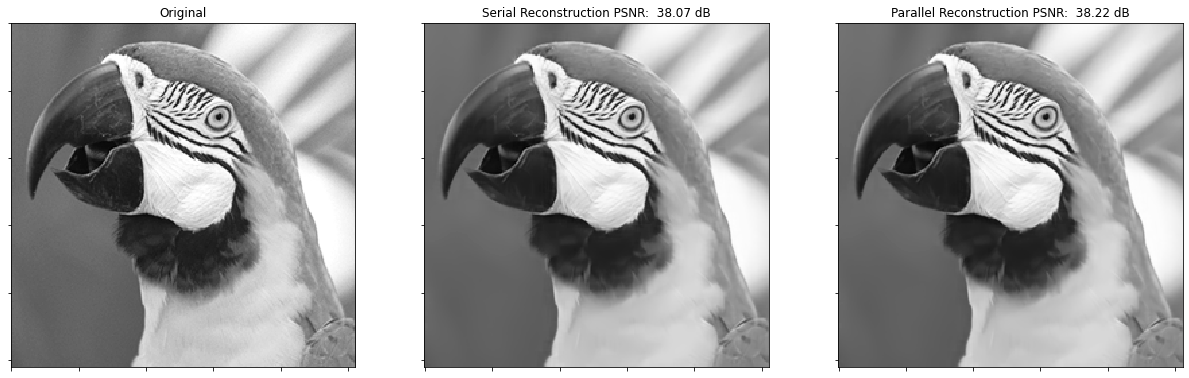

In [10]:
fig = plot.figure(figsize=(21, 7))
plot.subplot(1, 3, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgr, title=('Serial Reconstruction PSNR:  %5.2f dB' %
            sm.psnr(img, imgr)), fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr_par, title=('Parallel Reconstruction PSNR:  %5.2f dB' %
            sm.psnr(img, imgr_par)), fig=fig)
fig.show()

Display low pass component and sum of absolute values of coefficient maps of highpass component.

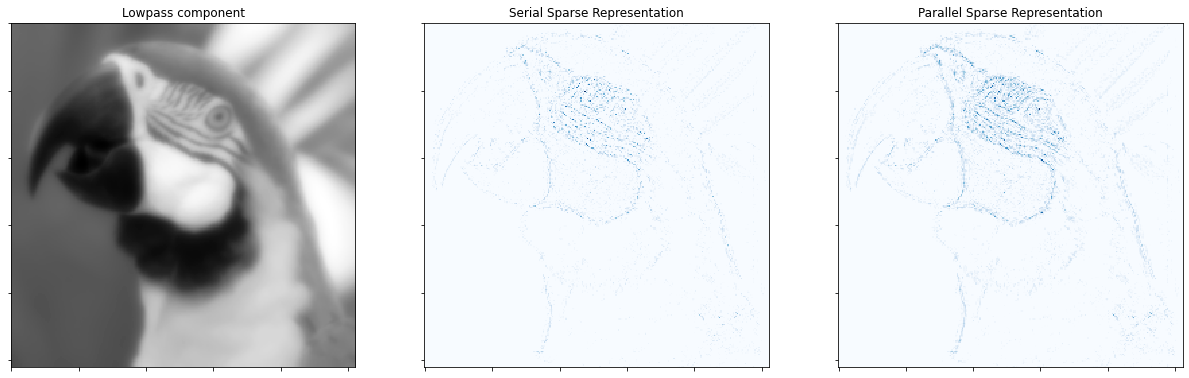

In [11]:
fig = plot.figure(figsize=(21, 7))
plot.subplot(1, 3, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(),
            cmap=plot.cm.Blues, title='Serial Sparse Representation',
            fig=fig)
plot.subplot(1, 3, 3)
plot.imview(np.sum(abs(X_par), axis=b.cri.axisM).squeeze(),
            cmap=plot.cm.Blues, title='Parallel Sparse Representation',
            fig=fig)
fig.show()